In [1]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sippy import functionset as fset
import matplotlib.pyplot as plt

# Data training done using SLC dataset

In [2]:
from dataPrep import DataPreparation
from modelling import Model

In [3]:
drivingProfile = pd.read_csv('./parameter.csv')
data = pd.read_csv('./SLC/SLC_input.csv')

In [4]:
dp = DataPreparation(drivingProfile)

In [5]:
Time = data['time'].to_numpy()
deltaSteer = data['Drv_DeltaSteer'].to_numpy()
Vx = data['Veh_Vx'].to_numpy()

In [6]:
[time, output] = dp.getOutput(Time, deltaSteer, Vx)
[time, input] = dp.getInput(Time, deltaSteer, Vx)

In [7]:
output = np.array(output)
input = np.array(input)

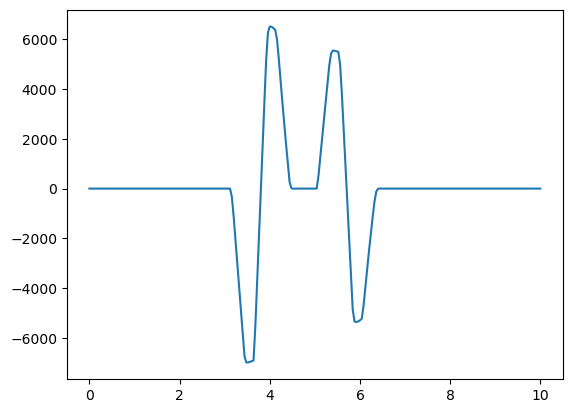

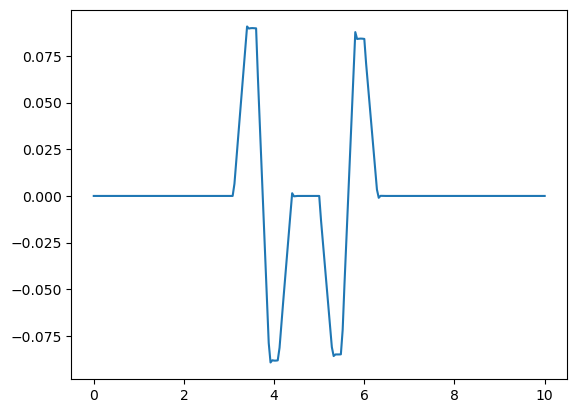

In [8]:
plt.plot(time, input[0])
plt.show()
plt.plot(time, input[1])

In [9]:
modelObj = Model(input=input, output=output)

In [10]:
[sysId, x_id, y_id] = modelObj.model_withoutNoise()

In [11]:
[sysId_noised, x_id_noised, y_id_noised, output_noised] = modelObj.model_withNoise(len(input[0]), [0.001, 0.01])

**Training Metrics**

In [12]:
print(f"For yaw rate :\nR2 Score: {r2_score(output[0], y_id[0])},       MSE: {mean_squared_error(output[0], y_id[0])}\n\n")
print(f"For inertial acceleration :\nR2 Score: {r2_score(output[1], y_id[1])},       MSE: {mean_squared_error(output[1], y_id[1])}")

For yaw rate :
R2 Score: 0.9999976531271237,       MSE: 4.7833812610600776e-08


For inertial acceleration :
R2 Score: 0.9999998913396073,       MSE: 1.5892352485614665e-06


In [13]:
print(f"For yaw rate :\nR2 Score: {r2_score(output_noised[0], y_id_noised[0])},       MSE: {mean_squared_error(output_noised[0], y_id_noised[0])}\n\n")
print(f"For inertial acceleration :\nR2 Score: {r2_score(output_noised[1], y_id_noised[1])},       MSE: {mean_squared_error(output_noised[1], y_id_noised[1])}")

For yaw rate :
R2 Score: 0.9589223098135474,       MSE: 0.0008790202232372937


For inertial acceleration :
R2 Score: 0.9993305351188918,       MSE: 0.00981750473170735


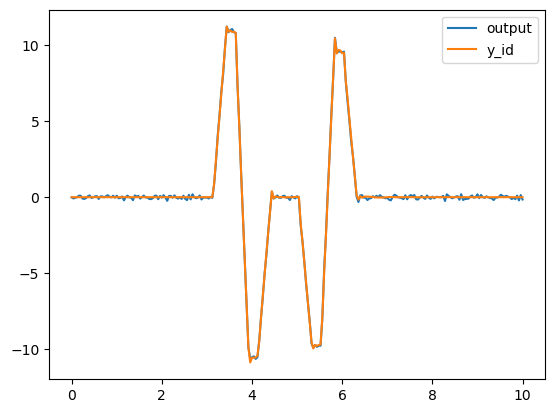

In [14]:
plt.plot(time, output_noised[1])
plt.plot(time, y_id_noised[1])
plt.legend(['output', 'y_id'])

# Testing on other datasets

## <span style="color: cyan">Circular</span>

In [15]:
data_circular = pd.read_csv('./Circular/circular_input.csv')
data_circular.head()

,samplingTime,Drv_DeltaSteer,Veh_Vx
0,0.000,0.0,30.000000
1,0.005,0.0,29.999664
2,0.010,0.0,29.998813
3,0.015,0.0,29.997596
4,0.020,0.0,29.996121


In [16]:
Time_circular = data_circular['samplingTime'].to_numpy()
deltaSteer_circular = data_circular['Drv_DeltaSteer'].to_numpy()
Vx_circular = data_circular['Veh_Vx'].to_numpy()

In [17]:
dp_circular = DataPreparation(drivingProfile)

In [18]:
[time_circular, output_circular] = dp.getOutput(Time_circular, deltaSteer_circular, Vx_circular)
[time_circular, input_circular] = dp.getInput(Time_circular, deltaSteer_circular, Vx_circular)
output_circular = np.array(output_circular)
input_circular = np.array(input_circular)

In [19]:
output_noised_cicular = output_circular + fset.white_noise_var(len(output_circular[0]), [0.001, 0.01])

In [20]:
x_id_circular, y_id_circular = modelObj.predict(sysId, input_circular)
# x_id_circular, y_id_circular = modelObj.predict(sysId_noised, input_circular)

In [21]:
print(f"For yaw rate :\nR2 Score: {r2_score(output_circular[0], y_id_circular[0])},       MSE: {mean_squared_error(output_circular[0], y_id_circular[0])}\n\n")
print(f"For inertial acceleration :\nR2 Score: {r2_score(output_circular[1], y_id_circular[1])},       MSE: {mean_squared_error(output_circular[1], y_id_circular[1])}")

For yaw rate :
R2 Score: 0.9989992022841989,       MSE: 1.6114510221962382e-05


For inertial acceleration :
R2 Score: 0.9997115499441769,       MSE: 0.003092833242000604


In [22]:
print(f"For yaw rate :\nR2 Score: {r2_score(output_noised_cicular[0], y_id_circular[0])},       MSE: {mean_squared_error(output_noised_cicular[0], y_id_circular[0])}\n\n")
print(f"For inertial acceleration :\nR2 Score: {r2_score(output_noised_cicular[1], y_id_circular[1])},       MSE: {mean_squared_error(output_noised_cicular[1], y_id_circular[1])}")

For yaw rate :
R2 Score: 0.9414477919965203,       MSE: 0.0009871916388131579


For inertial acceleration :
R2 Score: 0.998690221584436,       MSE: 0.014096446876437178


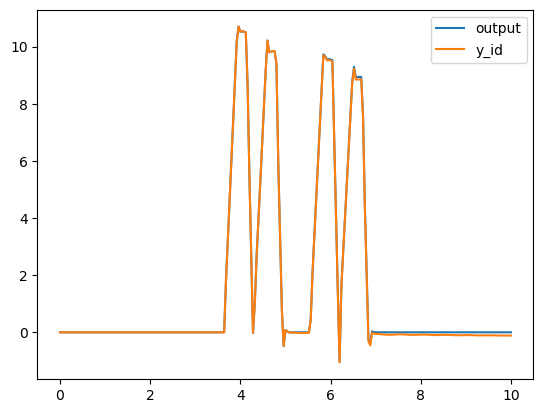

In [23]:
plt.plot(time_circular, output_circular[1])
plt.plot(time_circular, y_id_circular[1])
plt.legend(['output', 'y_id'])

## <span style="color: red">High Frequency</span>

In [24]:
data_hf = pd.read_csv('./HighFrq/HighFrq_input.csv')
data_hf.head()
data_hf.shape

(4601, 3)

In [25]:
dp_hf = DataPreparation(drivingProfile)

In [26]:
Time_hf = data_hf['Time'].to_numpy()
deltaSteer_hf = data_hf['Drv_DeltaSteer'].to_numpy()
Vx_hf = data_hf['Veh_Vx'].to_numpy()

In [27]:
[time_hf, output_hf] = (dp.getOutput(Time_hf, deltaSteer_hf, Vx_hf))
[time_hf, input_hf] = (dp.getInput(Time_hf, deltaSteer_hf, Vx_hf))
output_hf = np.array(output_hf)
output_hf_noised = output_hf + fset.white_noise_var(len(output_hf[0]), [0.001, 0.01])
input_hf = np.array(input_hf)

In [28]:
# x_id_hf, y_id_hf = modelObj.predict(sysId, input_hf)
x_id_hf, y_id_hf = modelObj.predict(sysId_noised, input_hf)

In [29]:
print(f"For yaw rate :\nR2 Score: {r2_score(output_hf_noised[0], y_id_hf[0])},       MSE: {mean_squared_error(output_hf_noised[0], y_id_hf[0])}\n\n")
print(f"For inertial acceleration :\nR2 Score: {r2_score(output_hf_noised[1], y_id_hf[1])},       MSE: {mean_squared_error(output_hf_noised[1], y_id_hf[1])}")

For yaw rate :
R2 Score: 0.37409372658422546,       MSE: 0.006483487929203799


For inertial acceleration :
R2 Score: 0.9125977223242733,       MSE: 0.21501730981073033


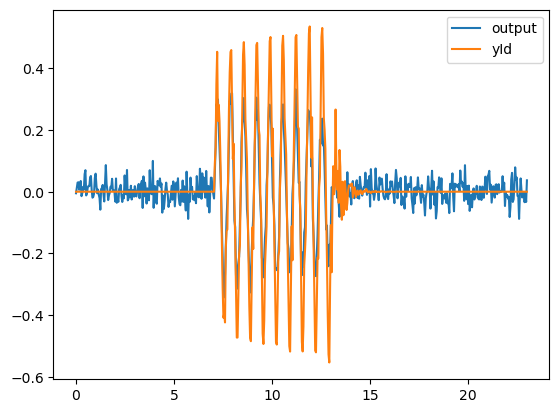

In [30]:
plt.plot(time_hf, output_hf_noised[0])
plt.plot(time_hf, y_id_hf[0])
plt.legend(['output', 'yId'])

## <span style="color: yellow">JTurn</span>

In [31]:
data_jturn = pd.read_csv('./JTurn/jTurn_input.csv')
data_jturn.head()
data_jturn.shape

(2001, 3)

In [32]:
dp_jturn = DataPreparation(drivingProfile)

In [33]:
Time_jturn = data_jturn['samplingTime'].to_numpy()
deltaSteer_jturn = data_jturn['Drv_DeltaSteer'].to_numpy()
Vx_jturn = data_jturn['Veh_Vx'].to_numpy()

In [34]:
[time_jturn, output_jturn] = (dp.getOutput(Time_jturn, deltaSteer_jturn, Vx_jturn))
[time_jturn, input_jturn] = (dp.getInput(Time_jturn, deltaSteer_jturn, Vx_jturn))
output_jturn = np.array(output_jturn)
output_noised_jturn = output_jturn + fset.white_noise_var(len(output_jturn[0]), [0.001, 0.01])
input_jturn = np.array(input_jturn)

In [35]:
x_id_jturn, y_id_jturn = modelObj.predict(sysId, input_jturn)
# x_id_jturn, y_id_jturn = modelObj.predict(sysId_noised, input_jturn)

In [36]:
print(f"For yaw rate :\nR2 Score: {r2_score(output_jturn[0], y_id_jturn[0])},       MSE: {mean_squared_error(output_jturn[0], y_id_jturn[0])}\n\n")
print(f"For inertial acceleration :\nR2 Score: {r2_score(output_jturn[1], y_id_jturn[1])},       MSE: {mean_squared_error(output_jturn[1], y_id_jturn[1])}")

For yaw rate :
R2 Score: 0.997213925958674,       MSE: 2.1499820788166304e-05


For inertial acceleration :
R2 Score: 0.9992070399854063,       MSE: 0.004159997976050564


In [37]:
print(f"For yaw rate :\nR2 Score: {r2_score(output_noised_jturn[0], y_id_jturn[0])},       MSE: {mean_squared_error(output_noised_jturn[0], y_id_jturn[0])}\n\n")
print(f"For inertial acceleration :\nR2 Score: {r2_score(output_noised_jturn[1], y_id_jturn[1])},       MSE: {mean_squared_error(output_noised_jturn[1], y_id_jturn[1])}")

For yaw rate :
R2 Score: 0.8935338999734116,       MSE: 0.0010036283614458807


For inertial acceleration :
R2 Score: 0.9974594909849863,       MSE: 0.01341794612472512


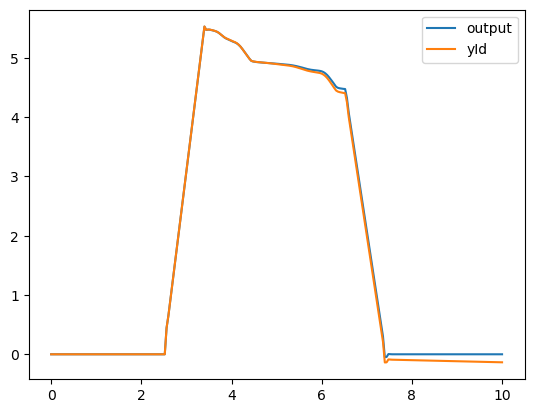

In [38]:
plt.plot(time_jturn, output_jturn[1])
plt.plot(time_jturn, y_id_jturn[1])
plt.legend(['output', 'yId'])

## <span style="color: cyan">VDA</span>

In [39]:
data_vda = pd.read_csv('./VDA/VDA_input.csv')
data_vda.head()
data_vda.shape

(1801, 3)

In [40]:
dp_vda = DataPreparation(drivingProfile)

In [41]:
Time_vda = data_vda['samplingTime'].to_numpy()
deltaSteer_vda = data_vda['Drv_DeltaSteer'].to_numpy()
Vx_vda = data_vda['Veh_Vx'].to_numpy()

In [42]:
[time_vda, output_vda] = (dp.getOutput(Time_vda, deltaSteer_vda, Vx_vda))
[time_vda, input_vda] = (dp.getInput(Time_vda, deltaSteer_vda, Vx_vda))
output_vda = np.array(output_vda)
output_noised_vda = output_vda + fset.white_noise_var(len(output_vda[0]), [0.001, 0.01])
input_vda = np.array(input_vda)

For yaw rate :
R2 Score: 0.9991016452159022,       MSE: 0.00011727384401188103


For inertial acceleration :
R2 Score: 0.9996078799080652,       MSE: 0.02249898024085239


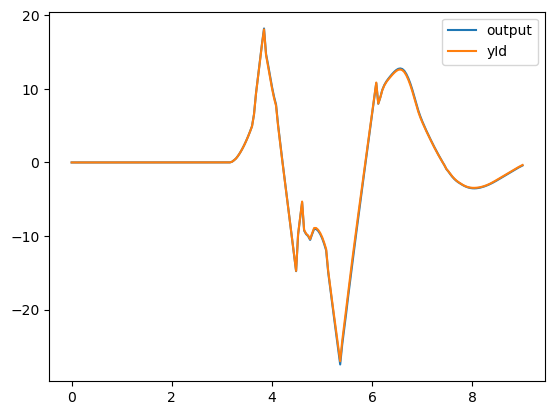

In [43]:
x_id_vda, y_id_vda = modelObj.predict(sysId, input_vda)

print(f"For yaw rate :\nR2 Score: {r2_score(output_vda[0], y_id_vda[0])},       MSE: {mean_squared_error(output_vda[0], y_id_vda[0])}\n\n")
print(f"For inertial acceleration :\nR2 Score: {r2_score(output_vda[1], y_id_vda[1])},       MSE: {mean_squared_error(output_vda[1], y_id_vda[1])}")

plt.plot(time_vda, output_vda[1])
plt.plot(time_vda, y_id_vda[1])
plt.legend(['output', 'yId'])

For yaw rate :
R2 Score: 0.989022232531036,       MSE: 0.0014231260874939932


For inertial acceleration :
R2 Score: 0.9989772911311494,       MSE: 0.058689490735753684


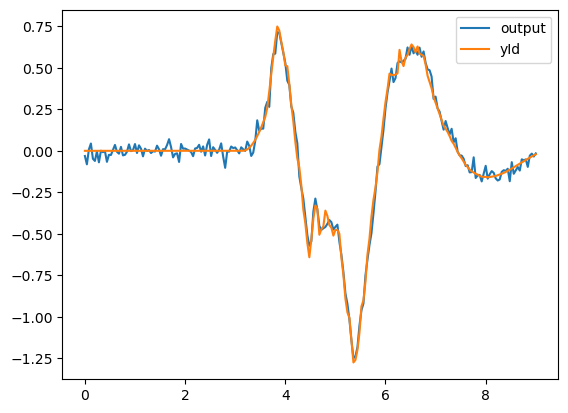

In [44]:
x_id_vda, y_id_vda = modelObj.predict(sysId_noised, input_vda)

print(f"For yaw rate :\nR2 Score: {r2_score(output_noised_vda[0], y_id_vda[0])},       MSE: {mean_squared_error(output_noised_vda[0], y_id_vda[0])}\n\n")
print(f"For inertial acceleration :\nR2 Score: {r2_score(output_noised_vda[1], y_id_vda[1])},       MSE: {mean_squared_error(output_noised_vda[1], y_id_vda[1])}")

plt.plot(time_vda, output_noised_vda[0])
plt.plot(time_vda, y_id_vda[0])
plt.legend(['output', 'yId'])